Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [13]:
NICKNAME = "Goshaan4k"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [15]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


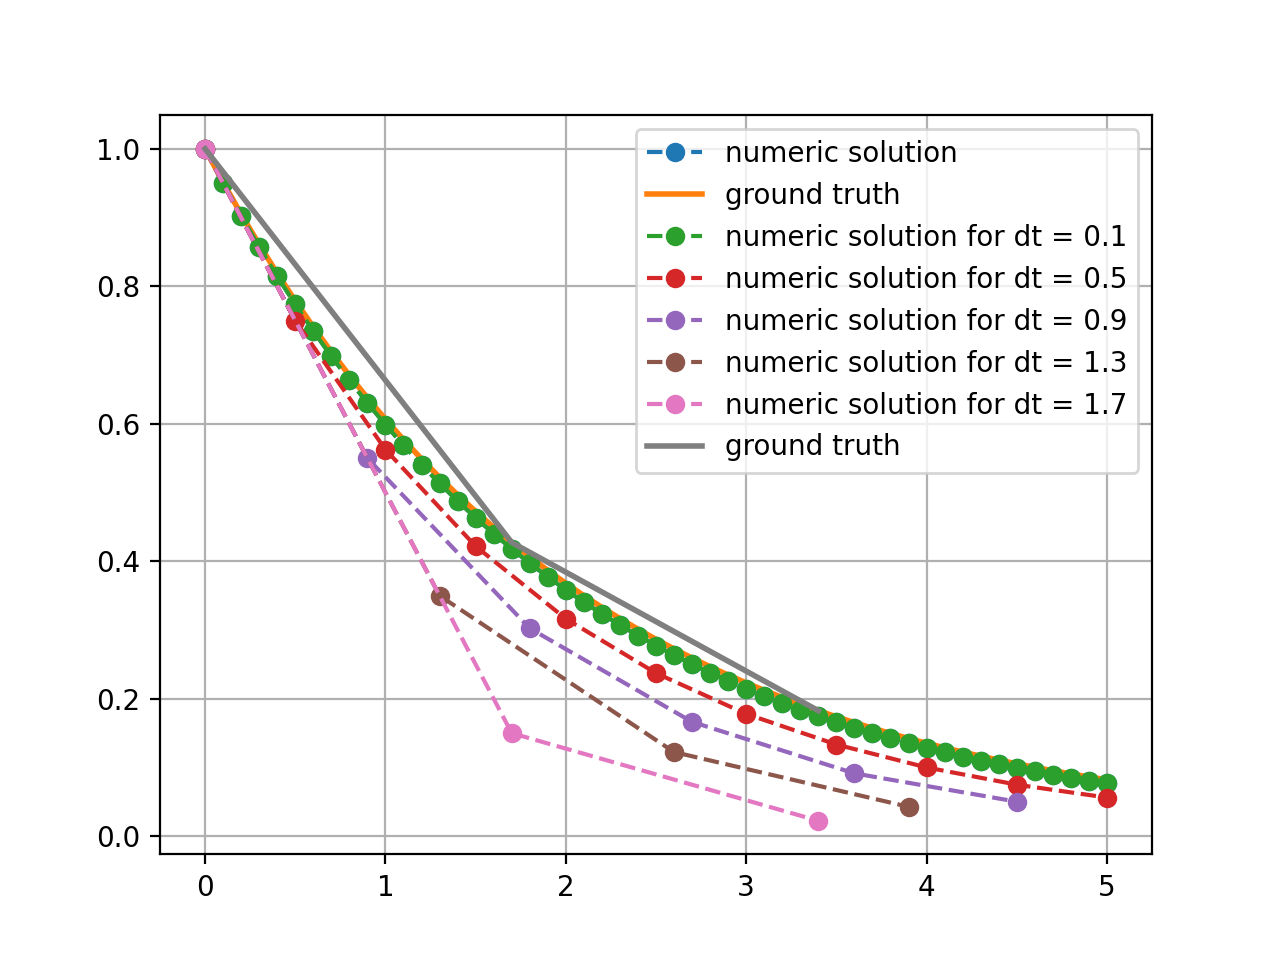

In [16]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

<IPython.core.display.Javascript object>


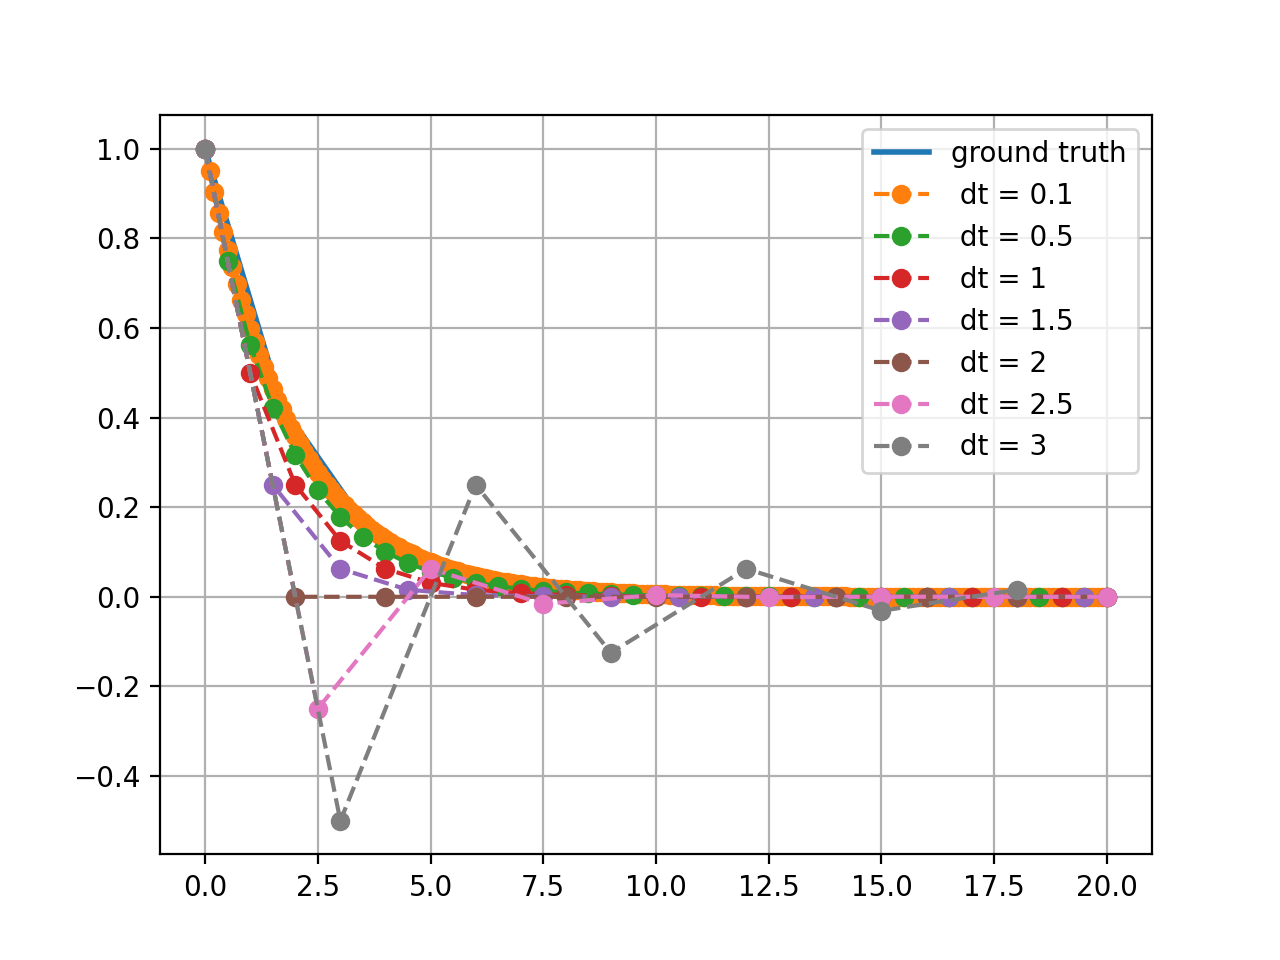

In [20]:
plt.figure()
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
for dt in [0.1, 0.5, 1, 1.5, 2, 2.5,  3]:
    tt, y = euler_solve(lam, u0=1.0, T=20, dt=dt)
    plt.plot(tt, y, 'o--', label=f' dt = {dt}')
plt.legend(loc='best')
plt.grid(True)

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

<IPython.core.display.Javascript object>


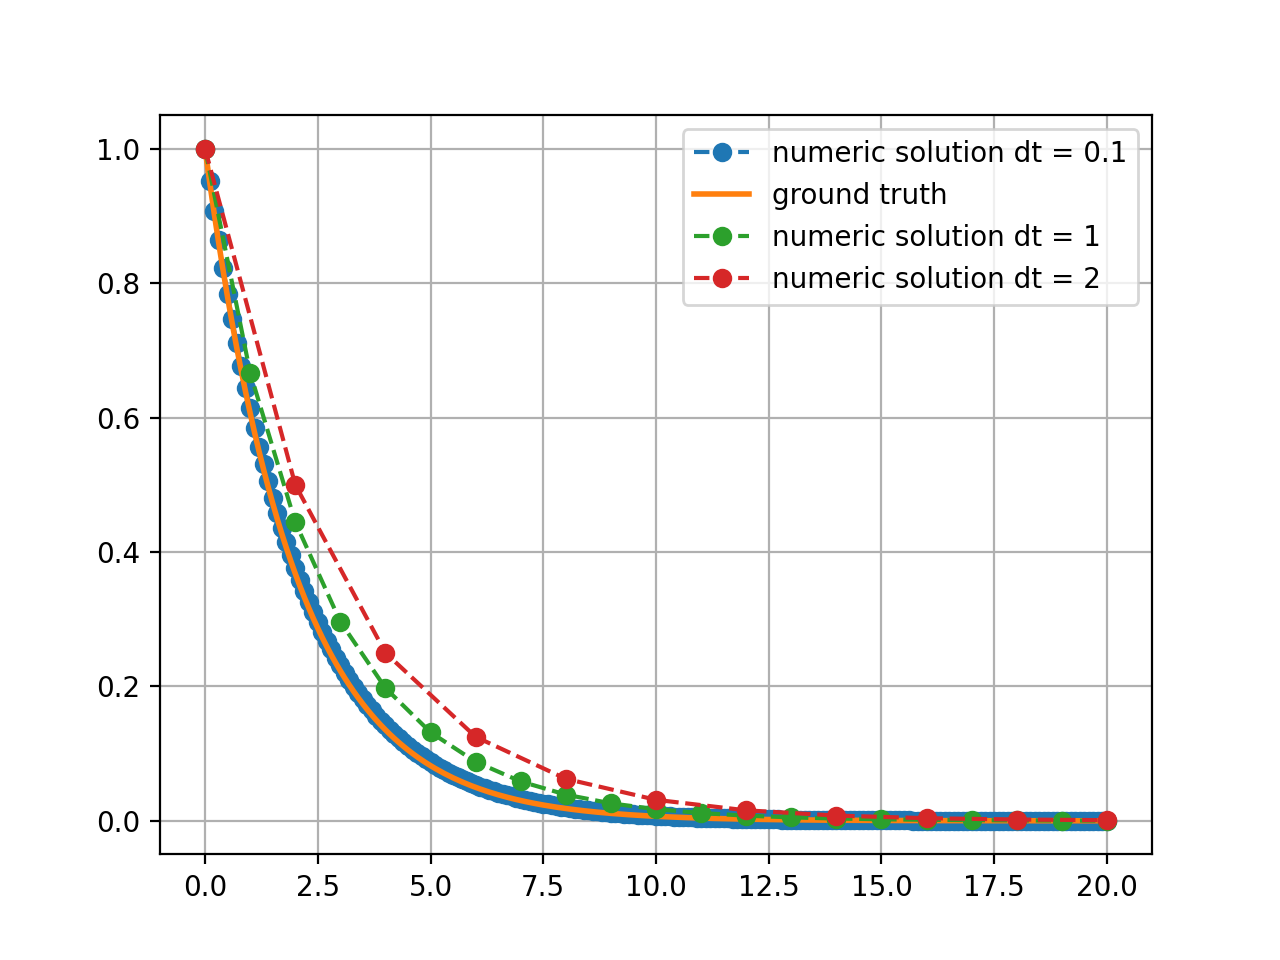

In [21]:
def Implicit_Euler(lam, u0, T, dt):
    num_steps = int(T / dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - lam * dt)
    return tt, y

plt.figure()
lam = -0.5
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution dt = 0.1')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=1)
plt.plot(tt, y, 'o--', label='numeric solution dt = 1')
tt, y = Implicit_Euler(lam, u0=1.0, T=20, dt=2)
plt.plot(tt, y, 'o--', label='numeric solution dt = 2')
plt.legend(loc='best')
plt.grid(True)

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [22]:
def matrixEuler(A, u0, T, dt):
    t = np.arange(0, T + dt, dt)
    y = np.zeros((len(u0), len(t)))
    y[:, 0] = u0
    for ind in range(len(t[:len(t) - 1])):
        y[:, ind + 1] = y[:, ind] + dt * A @ y[:, ind]
    return t, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

<IPython.core.display.Javascript object>


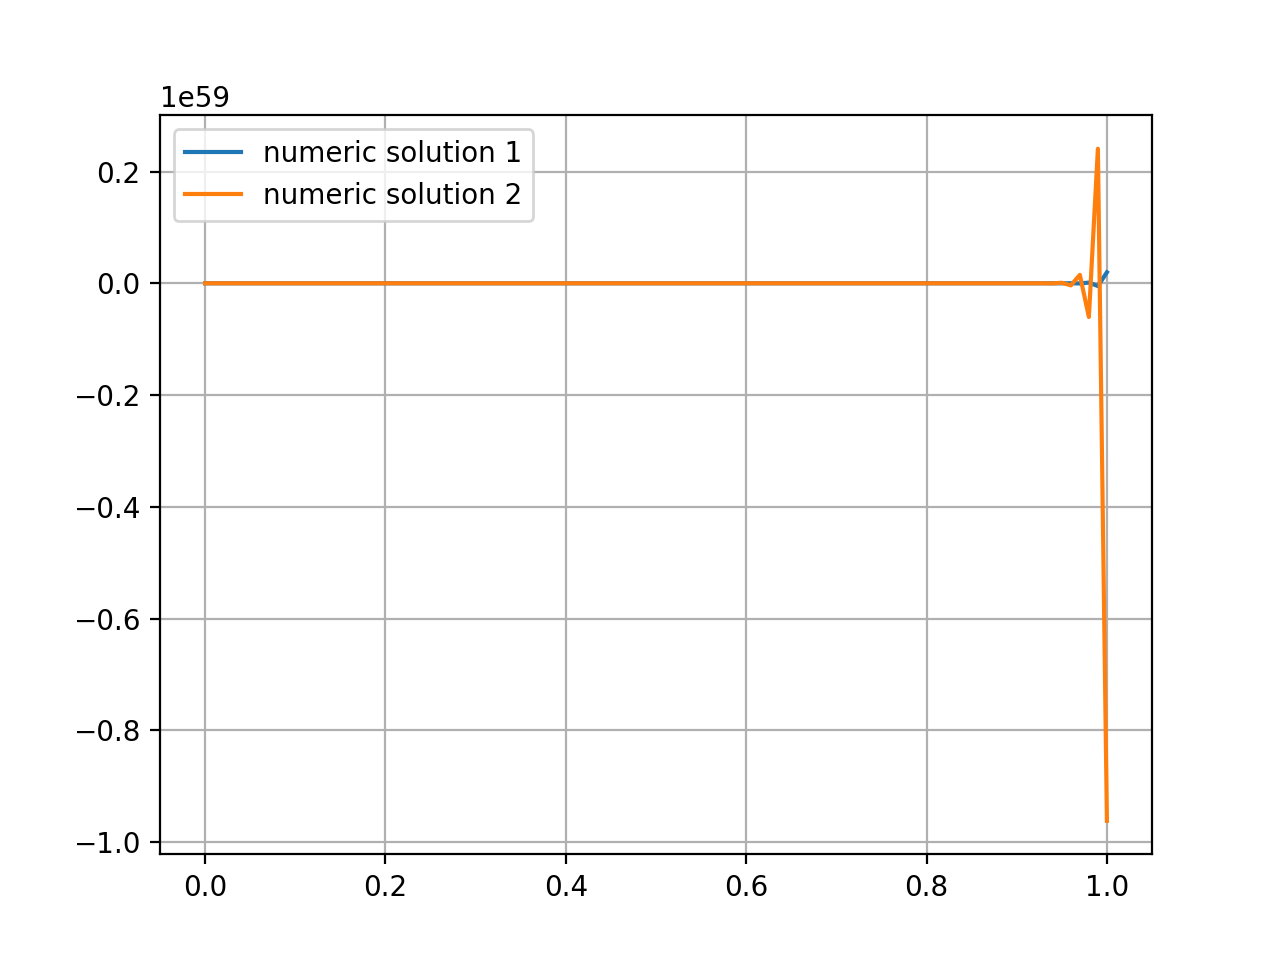

Собственные значения A:  [  -9.34647667 -499.65352333]


In [23]:
plt.figure()
A = np.array([[-10, 10], [32, -499]])
u0 = np.reshape([1, 0], (2,))
t, y = matrixEuler(A, u0, T=1, dt=0.01)
plt.plot(t, y[0], '-', label='numeric solution 1')
plt.plot(t, y[1], '-', label='numeric solution 2')
plt.legend(loc='best')
plt.grid(True)
print("Собственные значения A: ", np.linalg.eigvals(A))

### Тест II.2

Реализуйте \textit{неявную} схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

<IPython.core.display.Javascript object>


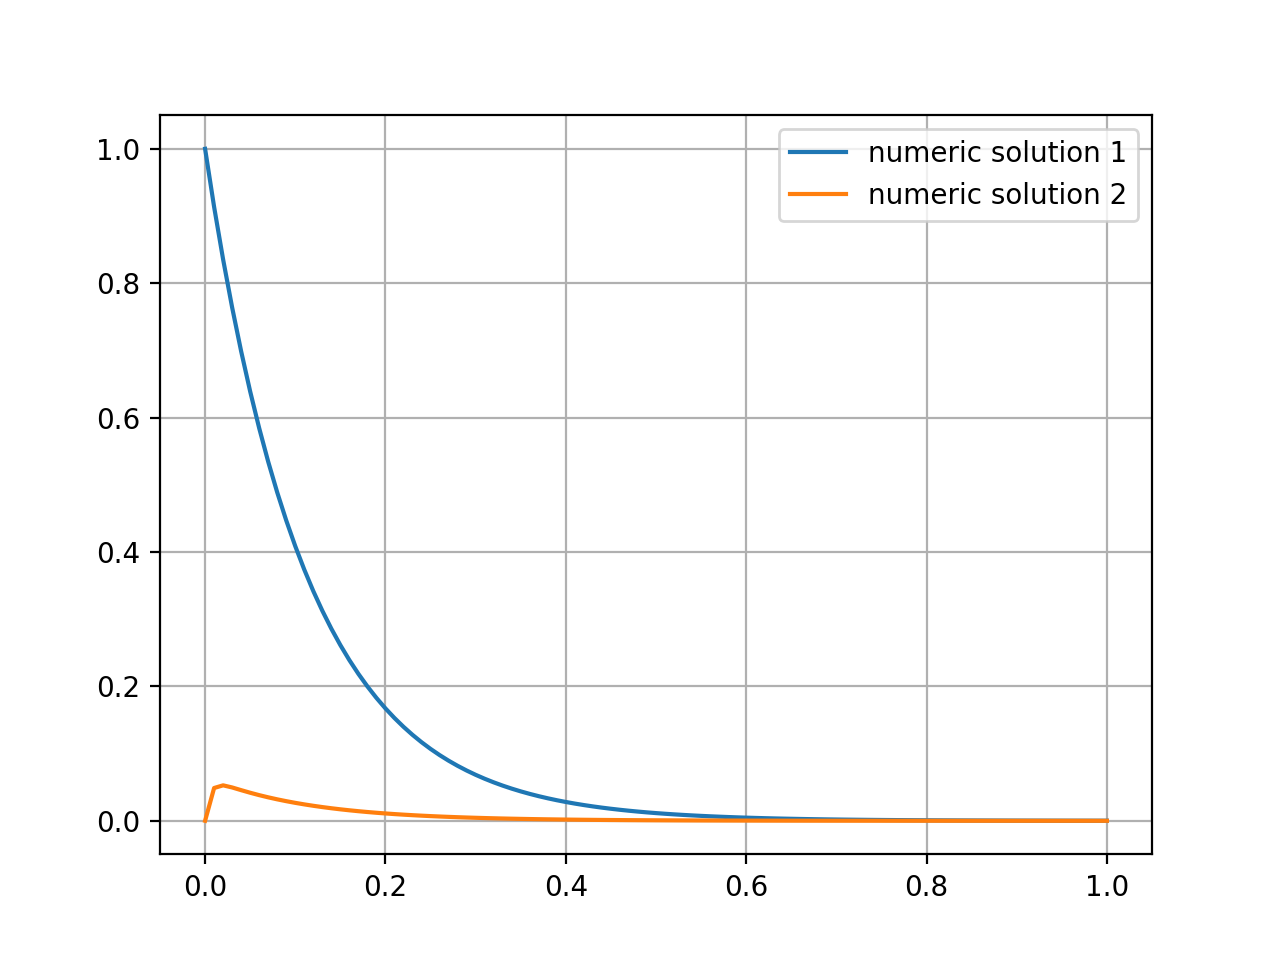

In [24]:
def Implicit_matrixEuler(A, u0, T, dt):
    t = np.arange(0, T + dt, dt)
    y = np.zeros((len(u0), len(t)))
    y[:, 0] = u0
    B = np.eye(2) - dt * A
    for ind in range(len(t[:len(t) - 1])):
        y[:, ind + 1] = np.linalg.solve(B, y[:, ind])
    return t, y

plt.figure()
A = np.array([[-10, 10], [32, -499]])
u0 = np.reshape([1, 0], (2,))
t, y = Implicit_matrixEuler(A, u0, T=1, dt=0.01)
plt.plot(t, y[0], '-', label='numeric solution 1')
plt.plot(t, y[1], '-', label='numeric solution 2')
plt.legend(loc='best')
plt.grid(True)

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$$

### Тест III.1 
Однако, если нас интересуют фазовые траектории(например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x,y)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

YOUR ANSWER HERE

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0)|$ , в зависимости от шага интегрирования $\tau$** проинтегрировав 
* Методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* Методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

<IPython.core.display.Javascript object>


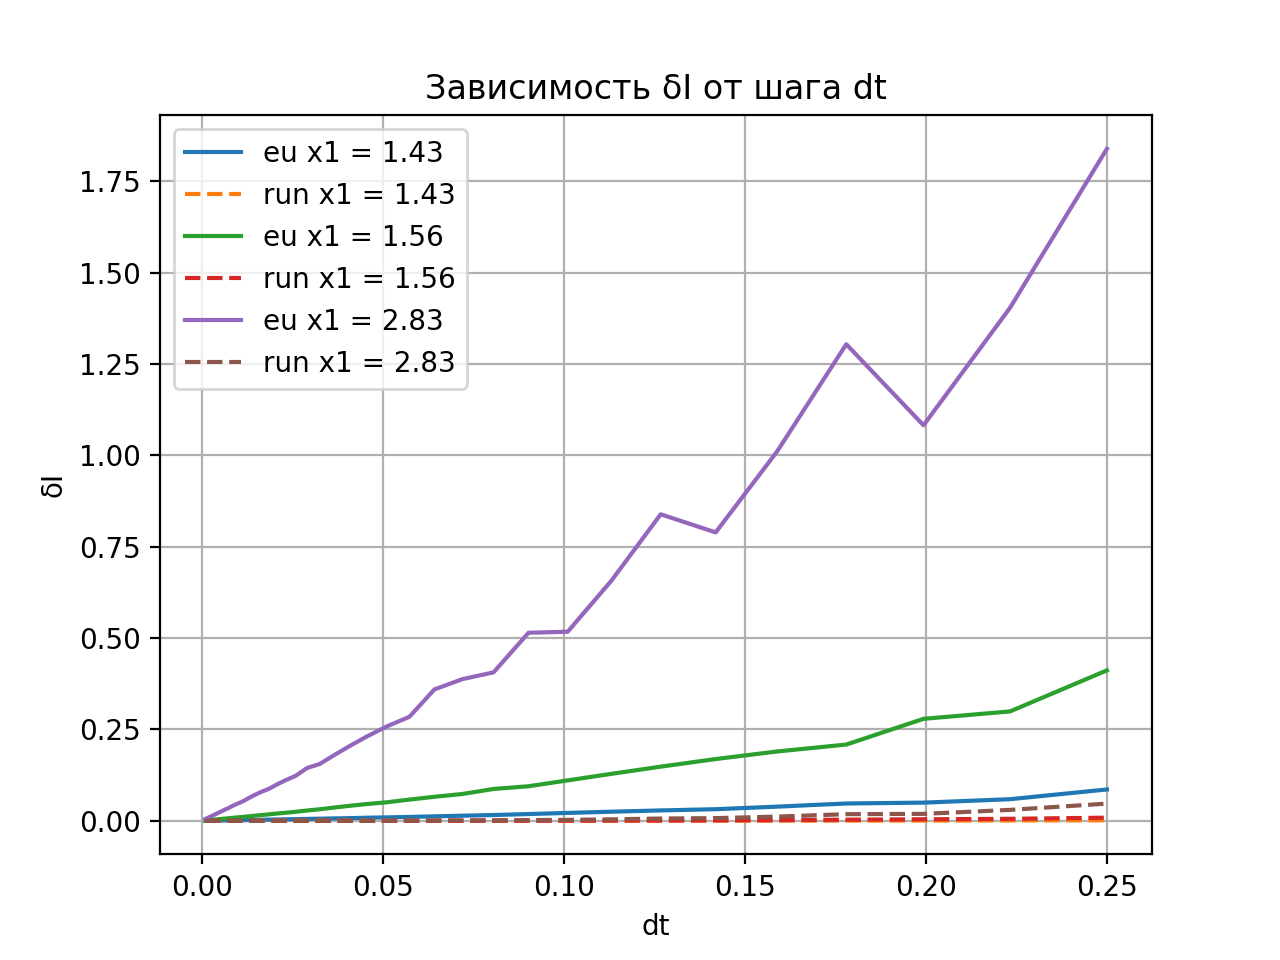

In [29]:
def EulerLankaster(A, u0, dt):
    res = np.reshape(u0, (2, 1))
    t = np.array([0])
    y = np.array(u0)
    B = np.eye(2) - dt * A
    # i = 0
    while y[0] > 0 and y[1] > 0:
        y = np.linalg.solve(B, y)
        res = np.hstack((res, np.reshape(y, (2, 1))))
        #t = np.hstack((t, np.array([dt * i])))
        # i += 1
    return res


def RungeKuta2nd(A, u0, dt):
    res = np.reshape(u0, (2, 1))
    y = np.array(u0)
    t = np.array([0])
    # i = 0
    while y[0] > 0 and y[1] > 0:
        k1 = dt * A @ y
        k2 = dt * A @ (k1 + y)
        y = y + 0.5 * (k1 + k2)
        res = np.hstack((res, np.reshape(y, (2, 1))))
        # t = np.hstack((t, np.array([dt * i])))
        # i += 1
    return res


def EulerHelp(A, u0):
    Er = np.array([])
    for dt in Dt:
        x1 = EulerLankaster(A, u0, dt)[0][-1]
        x2 = EulerLankaster(A, u0, dt)[1][-1]
        x10 = EulerLankaster(A, u0, dt)[0][0]
        x20 = EulerLankaster(A, u0, dt)[1][0]
        er = abs(x1**2 - 2*(x2)**2 - x10**2 + 2 * (x20)**2)
        Er = np.hstack((Er, er))
    return Er


def RungeHelp(A, u0):
    Er = np.array([])
    for dt in Dt:
        x1 = RungeKuta2nd(A, u0, dt)[0][-1]
        x2 = RungeKuta2nd(A, u0, dt)[1][-1]
        x10 = RungeKuta2nd(A, u0, dt)[0][0]
        x20 = RungeKuta2nd(A, u0, dt)[1][0]
        er = abs(x1**2 - 2*(x2)**2 - x10**2 + 2 * (x20)**2)
        Er = np.hstack((Er, er))
    return Er


A = np.array([[0, -2], [-1, 0]])

Dt = np.logspace(-10, -2, 50, base = 2)
plt.figure()

u0 = [1.43, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 1.43')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 1.43")

u0 = [1.56, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 1.56')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 1.56")

u0 = [2.83, 1]
plt.plot(Dt, EulerHelp(A, u0), '-', label='eu x1 = 2.83')
plt.plot(Dt, RungeHelp(A, u0), "--", label="run x1 = 2.83")

plt.title('Зависимость δI от шага dt')
plt.xlabel('dt')
plt.ylabel('δI')
plt.legend(loc='best')
plt.grid(True)

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

<IPython.core.display.Javascript object>


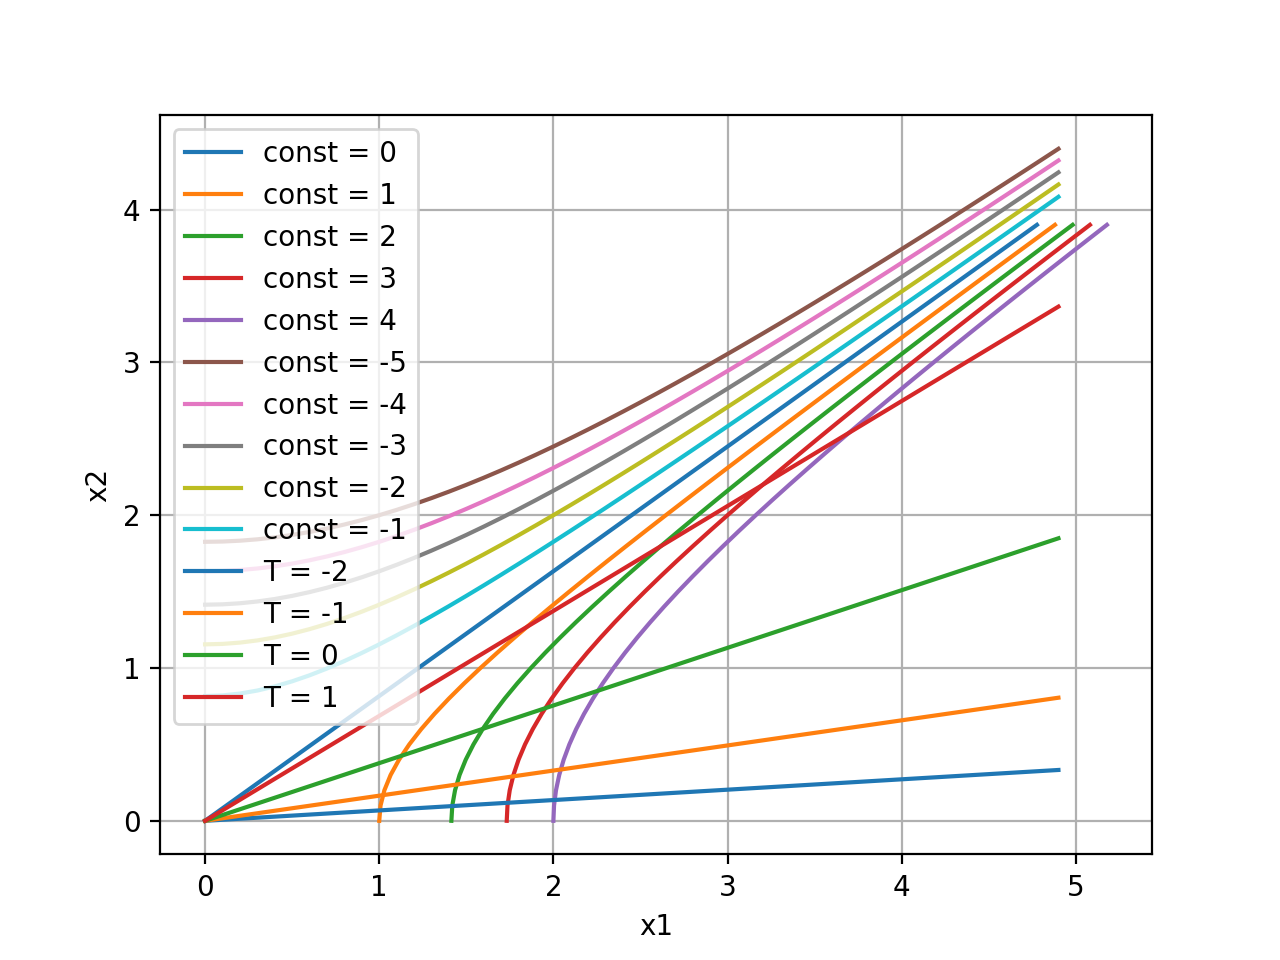

In [30]:
x2 = np.arange(0, 4, 0.1)
plt.figure()
for i in np.arange(0, 5, 1):
    x1 = (i + 1.5 * x2**2) ** (0.5)
    plt.plot(x1, x2, label = 'const = ' f"{i}")
x1 = np.arange(0, 5, 0.1)
for i in np.arange(-5, 0, 1):
    x2 = ((2 / 3) * (x1**2 - i))**0.5
    plt.plot(x1, x2, label = 'const = ' f"{i}")
for T in np.arange(-2, 2, 1):
    x2 = (2 / 3)**(0.5) * x1 * (np.exp(6**(0.5 * T)) - 1) / (1 + np.exp(6 ** (0.5 * T)))
    plt.plot(x1, x2, label = 'T = ' f"{T}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='best')
plt.grid(True)